In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing, ensemble, model_selection,decomposition,metrics
import xgboost as xgb

In [ ]:
#Funções

def plot_matrix_confusao(y_test, y_pred):
    cm = metrics.confusion_matrix(y_test, y_pred)
    tn, fp, fn, tp = cm.ravel()

    fig = plt.figure(figsize=(10, 8))

    labels = np.array([
        [f"TN = {tn}", f"FP = {fp}"],
        [f"FN = {fn}", f"TP = {tp}"]
    ])

    sns.heatmap(cm, annot=labels, fmt='', cmap='Greens')
    plt.xlabel('Predição')
    plt.ylabel('Realidade')
    plt.title('Matriz de Confusão')
    plt.show()

def calculo_metricas(y_true, y_pred):
    accuracy = metrics.accuracy_score(y_true, y_pred)
    precision = metrics.precision_score(y_true, y_pred)
    recall = metrics.recall_score(y_true, y_pred)
    f1 = metrics.f1_score(y_true, y_pred)
    return accuracy, precision, recall, f1



### Pré-Processamento

In [ ]:
df_customers = pd.read_csv('https://raw.githubusercontent.com/cassiusf/datasets/main/customers_data.csv')


#Eliminando observações que contenham dados ausentes (NA)
df_customers_clean = df_customers.dropna().copy()


#"1" indica compras via canal "Horeca" (Hotel/Retail/Café) e "2" indica compras via canal Retail (varejo).
#Recodifique a variável alvo, utilizando (1) para Horeca (Hotel/Restaurant/Café) e (0) para Retail channel.
df_customers_clean = pd.get_dummies(df_customers_clean, columns=['Region'], prefix='Region', dtype=int)
df_customers_clean['Channel'] = df_customers_clean['Channel'].replace({2: 0})

#Separando o dataframe resultante em Treino-Teste, utilizando a proporção 75-25%
features = df_customers_clean.drop(columns=['Channel'])
target = df_customers_clean['Channel']
X_train, X_test, y_train, y_test = model_selection.train_test_split(features, target, test_size=0.25, random_state=42)

#Escalonamento
scaler = preprocessing.StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

df_customers_clean.head()



,Channel,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Region_1,Region_2,Region_3
0,0,12669,9656,7561,214,2674,1338,0,0,1
1,0,7057,9810,9568,1762,3293,1776,0,0,1
2,0,6353,8808,7684,2405,3516,7844,0,0,1
3,1,13265,1196,4221,6404,507,1788,0,0,1
4,0,22615,5410,7198,3915,1777,5185,0,0,1


###  Aplicando um modelo Random Forest

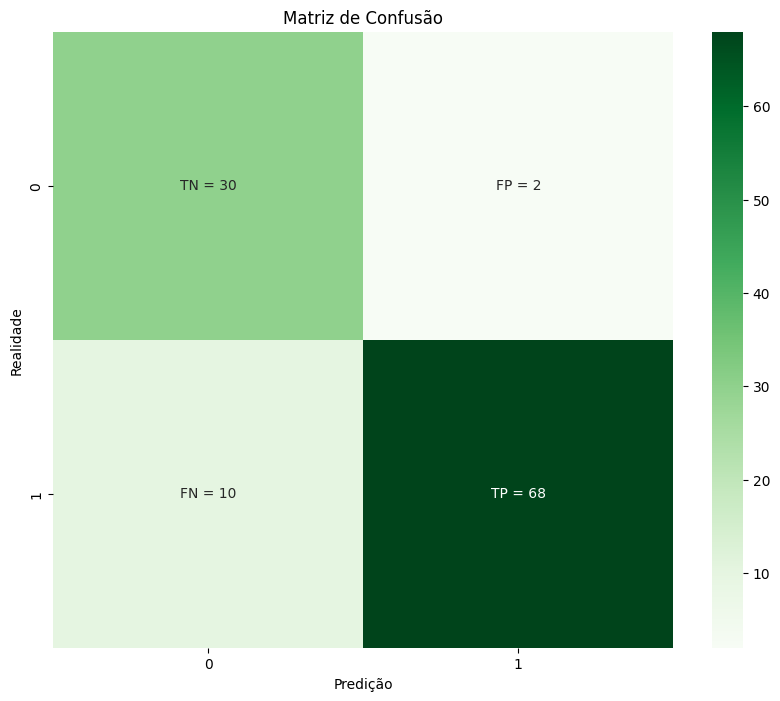

Acurácia: 89.09%
Precisão: 0.97
Recall: 0.87
F1 Score: 0.92


In [ ]:
# Random Forest utilizando as opções padrão do classificador.
rf = ensemble.RandomForestClassifier()
rf.fit(X_train_scaled, y_train)
y_pred = rf.predict(X_test_scaled)

# Apresentando também a matriz de confusão
rf_cm = plot_matrix_confusao(y_test, y_pred)

# Apresentando as métricas de avaliação
accuracy, precision, recall, f1_score = calculo_metricas(y_test, y_pred)
print(f"Acurácia: {accuracy * 100:.2f}%")
print(f"Precisão: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1_score:.2f}")

###  Aplicando um modelo XGBoost

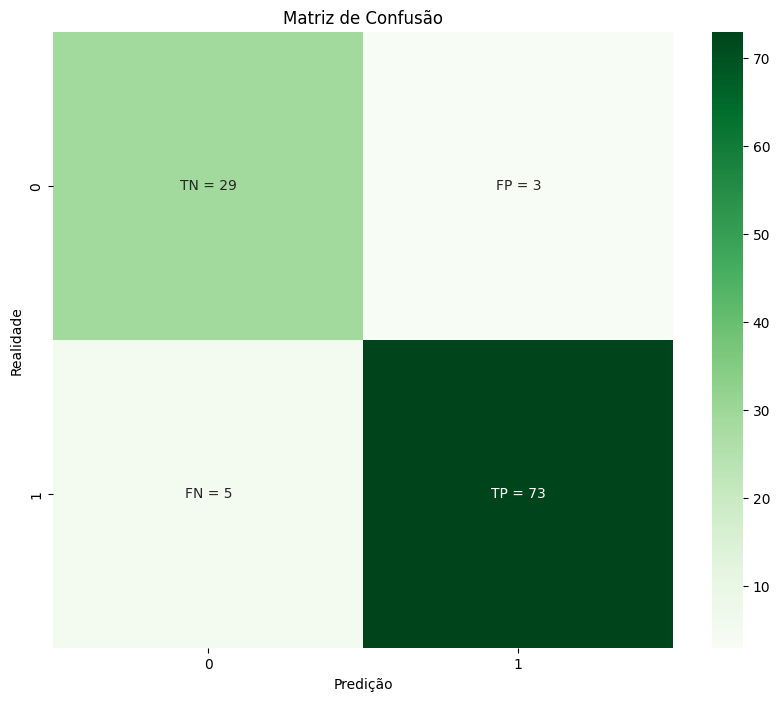

Acurácia: 92.73%
Precisão: 0.96
Recall: 0.94
F1 Score: 0.95


In [ ]:
#Execute o algoritmo XGBoost na mesma base, utilizando apenas as configurações padrão do modelo

xgb = xgb.XGBClassifier()
xgb.fit(X_train_scaled, y_train)
y_pred = xgb.predict(X_test_scaled)


# Apresentando também a matriz de confusão
xgb_cm = plot_matrix_confusao(y_test, y_pred)

# Apresentando as métricas de avaliação
accuracy_xgb, precision_xgb, recall_xgb, f1_score_xgb = calculo_metricas(y_test, y_pred)
print(f"Acurácia: {accuracy_xgb * 100:.2f}%")
print(f"Precisão: {precision_xgb:.2f}")
print(f"Recall: {recall_xgb:.2f}")
print(f"F1 Score: {f1_score_xgb:.2f}")

### Qual modelo você utilizaria, a partir dos resultados da execução dos dois modelos? Justifique sua resposta.

_Ambos os modelos apresentaram resultados bastantes satisfatórios, mesmo usando as configurações  padrão, com diferenças pouco significativas.  No entanto, o algoritmo XGBoost apresentou melhor desempenho, alcançando mais de 90% em todas as métricas e apresentando menores valores de falsos positivos e falsos negativos na matriz de confusão, portanto,  eu utilizaria o XGBoost, pois se mostrou mais eficiente e preciso para este conjunto de dados._